In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option("display.max_columns", None)


def get_project_root() -> Path:
    current = Path(__file__).resolve() if "__file__" in globals() else Path().resolve()
    for parent in [current] + list(current.parents):
        if (parent / ".git").exists():
            return parent
    raise RuntimeError("Project root not found")


PROJECT_ROOT = get_project_root()

DATA_PATH = PROJECT_ROOT / "data" / "built_for_eda"
OUTPUT_DIR = PROJECT_ROOT / "artifacts" / "figures"

OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

In [21]:
df = pd.read_csv(f"{DATA_PATH}/standard_data.csv")

print(df.shape)
df.head()

(3031734, 16)


,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Beat,Community Area,Latitude,Longitude,Year,Month,Day,Hour,DayOfWeek
0,2025-12-31 23:58:00,ASSAULT,SIMPLE,RESIDENCE,False,False,9.0,931,61.0,41.802549,-87.667246,2025,12,31,23,2
1,2025-12-31 23:55:00,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,APARTMENT,False,True,15.0,1522,25.0,41.882329,-87.758411,2025,12,31,23,2
2,2025-12-31 23:54:00,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",RESTAURANT,True,False,12.0,1215,28.0,41.885427,-87.661759,2025,12,31,23,2
3,2025-12-31 23:54:00,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,16.0,1651,76.0,41.976290,-87.905227,2025,12,31,23,2
4,2025-12-31 23:54:00,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,16.0,1651,76.0,41.976290,-87.905227,2025,12,31,23,2


### Temporal Pattern Analysis

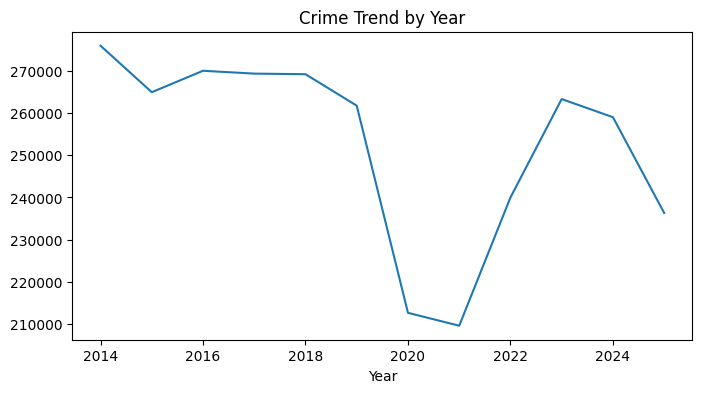

In [27]:
yearly = df.groupby("Year").size()

plt.figure(figsize=(8,4))
yearly.plot()
plt.title("Crime Trend by Year")

# Save the trend line
plt.savefig(f"{OUTPUT_DIR}/crime_trend_yearly.png", bbox_inches='tight')

plt.show()


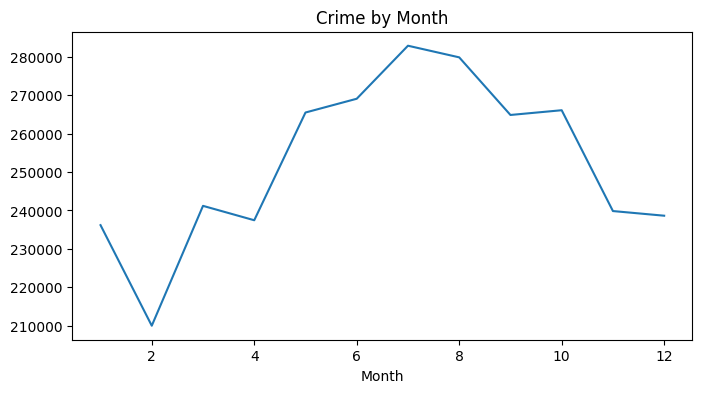

In [28]:
monthly = df.groupby("Month").size()

plt.figure(figsize=(8,4))
monthly.plot()
plt.title("Crime by Month")

# Save the monthly trend
plt.savefig(f"{OUTPUT_DIR}/crime_trend_monthly.png", bbox_inches='tight')

plt.show()


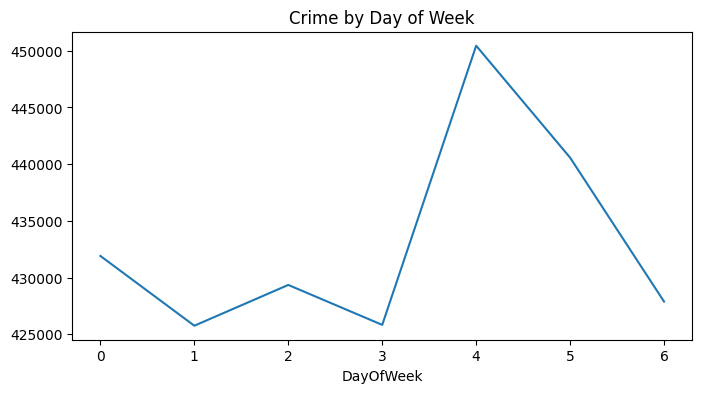

In [29]:
weekday = df.groupby("DayOfWeek").size()

plt.figure(figsize=(8,4))
weekday.plot()
plt.title("Crime by Day of Week")

# Save the weekday trend
plt.savefig(f"{OUTPUT_DIR}/crime_trend_weekday.png", bbox_inches='tight')

plt.show()


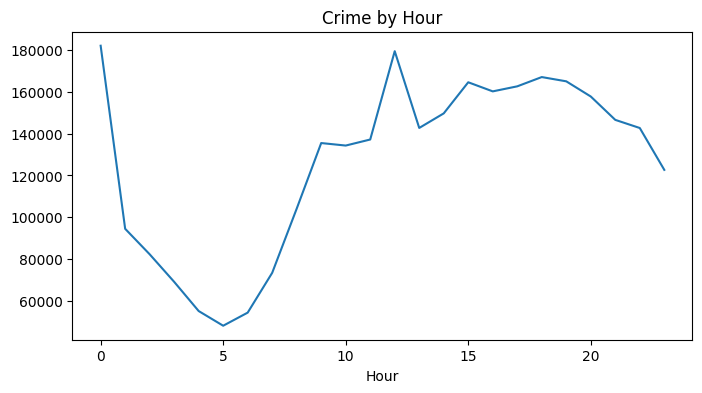

In [30]:
hourly = df.groupby("Hour").size()

plt.figure(figsize=(8,4))
hourly.plot()
plt.title("Crime by Hour")

# Save the hourly trend
plt.savefig(f"{OUTPUT_DIR}/crime_trend_hourly.png", bbox_inches='tight')

plt.show()


### Spatial Distribution Study

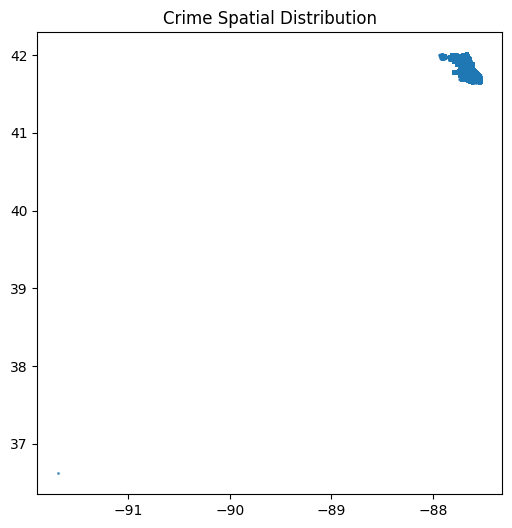

In [7]:
geo_df = df.dropna(subset=["Latitude", "Longitude"])

plt.figure(figsize=(6,6))
plt.scatter(
    geo_df["Longitude"],
    geo_df["Latitude"],
    s=1,
    alpha=0.1
)
plt.title("Crime Spatial Distribution")

# Save the spatial plot
plt.savefig(f"{OUTPUT_DIR}/crime_spatial_distribution.png", bbox_inches='tight', dpi=300)

plt.show()


In [ ]:
import folium
import geopandas as gpd
from folium import GeoJson

geo_df = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df['Longitude'], geo_df['Latitude']))

m = folium.Map(location=[geo_df["Latitude"].mean(), geo_df["Longitude"].mean()], zoom_start=12)

GeoJson(geo_df).add_to(m)

m.save(f"{OUTPUT_DIR}/crime_spatial_distribution_map.html")


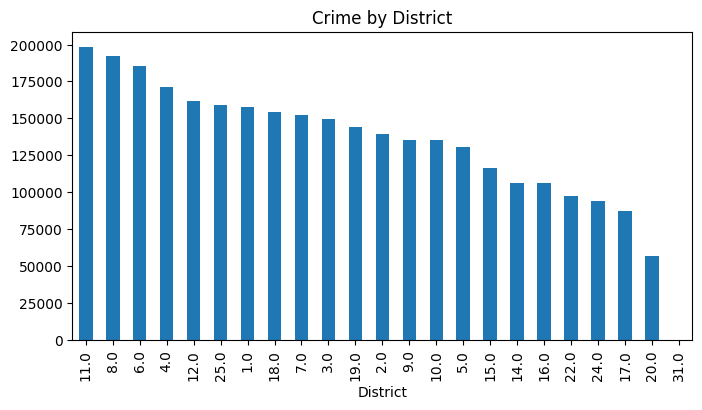

In [31]:
district_counts = df["District"].value_counts()

plt.figure(figsize=(8,4))
district_counts.plot(kind="bar")
plt.title("Crime by District")

# Save the district bar chart
plt.savefig(f"{OUTPUT_DIR}/crime_by_district.png", bbox_inches='tight')

plt.show()


###  Crime Correlation Analysis

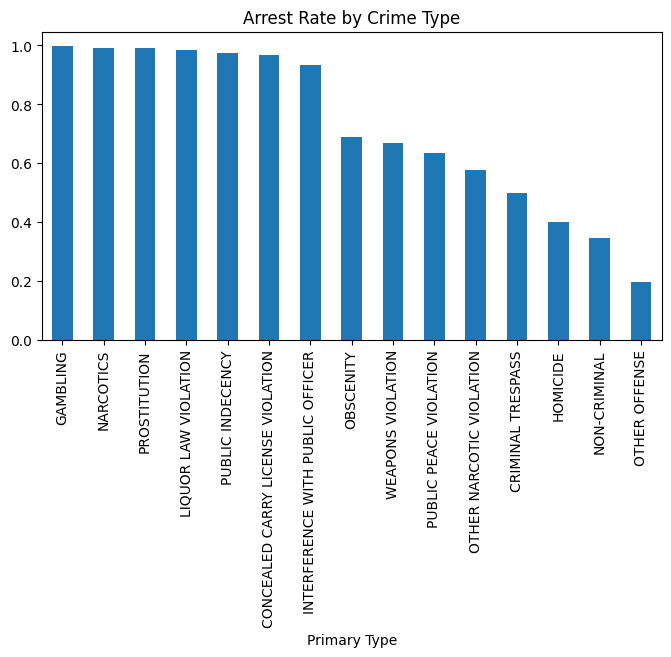

In [32]:
arrest_by_type = (
    df.groupby("Primary Type")["Arrest"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(8,4))
arrest_by_type.plot(kind="bar")
plt.title("Arrest Rate by Crime Type")

plt.savefig(f"{OUTPUT_DIR}/arrest_rate_by_type.png", bbox_inches='tight')

plt.show()


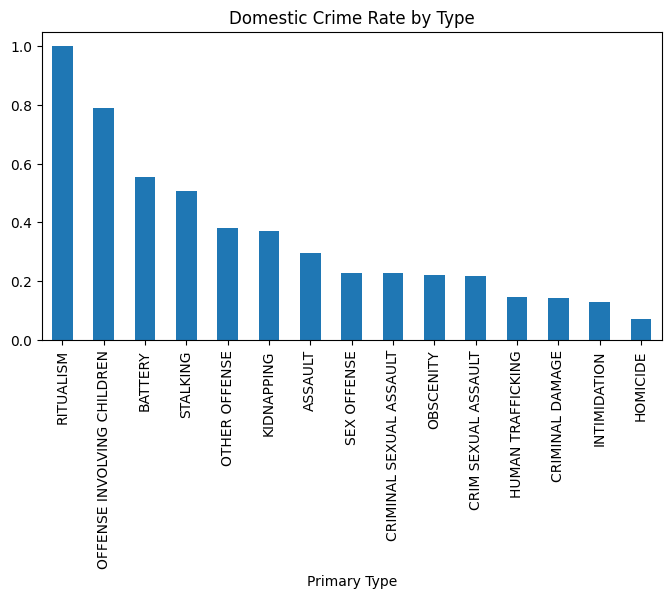

In [33]:
domestic_by_type = (
    df.groupby("Primary Type")["Domestic"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(8,4))
domestic_by_type.plot(kind="bar")
plt.title("Domestic Crime Rate by Type")

plt.savefig(f"{OUTPUT_DIR}/domestic_rate_by_type.png", bbox_inches='tight')

plt.show()


### summary

In [36]:
summary = {
    "total_crimes": len(df),
    "top_crime_type": df["Primary Type"].value_counts().idxmax(),
    "highest_arrest_type": arrest_by_type.idxmax(),
    "peak_hour": hourly.idxmax(),
    "peak_month": monthly.idxmax()
}

summary

{'total_crimes': 3031734,
 'top_crime_type': 'THEFT',
 'highest_arrest_type': 'GAMBLING',
 'peak_hour': np.int64(0),
 'peak_month': np.int64(7)}